# Right join to find unique movies

Most of the recent big-budget science fiction movies can also be classified as action movies. You are given a table of science fiction movies called scifi_movies and another table of action movies called action_movies. Your goal is to find which movies are considered only science fiction movies. Once you have this table, you can merge the movies table in to see the movie names. Since this exercise is related to science fiction movies, use a right join as your superhero power to solve this problem.

The movies, scifi_movies, and action_movies tables have been loaded for you.


* Merge action_movies and scifi_movies tables with a right join on movie_id. Save the result as action_scifi.
* Update the merge to add suffixes, where '_act' and '_sci' are suffixes for the left and right tables, respectively.
* From action_scifi, subset only the rows where the genre_act column is null.
* Merge movies and scifi_only using the id column in the left table and the movie_id column in the right table with an inner join.

In [5]:
import pandas as pd

movies = pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv", index_col=0)
movies.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [21]:
# Rename the index (show_id) from s1, s2, etc., to 1, 2, etc.
movies.index = [str(i) for i in range(1, len(movies) + 1)]
# movies.index.name = 'show_id'

# Reset the index to turn 'show_id' back into a column
movies = movies.reset_index()

# Display the updated DataFrame
print(movies.head())

# Now check the columns to see 'show_id' included
print(movies.columns)


  index show_id     type                  title         director  \
0     1       1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1     2       2  TV Show          Blood & Water              NaN   
2     3       3  TV Show              Ganglands  Julien Leclercq   
3     4       4  TV Show  Jailbirds New Orleans              NaN   
4     5       5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seas

In [12]:
import pandas as pd

movies_list = pd.read_csv("/kaggle/input/movies-dataset-1980-2020/movies_1980_2020_30k.csv", index_col=0)

# Add a new 'id' column with values ranging from 1 to the number of rows
movies_list['show_id'] = range(1, len(movies_list) + 1)

# Display the updated DataFrame
# movies_list.head()
movies_list.head()

,Director,Genre,Release Date,Duration,Rating,show_id
Title,,,,,,
Key entire popular.,Anthony Becker,Horror,1981-05-12,102,6.8,1
Gun husband reveal.,William Johnson,Documentary,2016-06-13,92,7.6,2
Crime cover.,Amy Le,Drama,1988-03-22,144,5.5,3
Challenge.,Andrea Martinez,Romance,2013-04-01,161,2.0,4
Close study.,Michael Rodgers,Fantasy,2012-10-18,177,3.7,5


In [15]:
print(movies.columns)


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [13]:
print(movies_list.columns)

Index(['Director', 'Genre', 'Release Date', 'Duration', 'Rating', 'show_id'], dtype='object')


In [17]:
# Convert both 'show_id' and 'id' to string before merging
movies['show_id'] = movies['show_id'].astype(str)
movies_list['show_id'] = movies_list['show_id'].astype(str)

# Perform the right join on 'show_id' from movies and 'id' from movies_list
movies_mix = movies.merge(movies_list, left_on='show_id', right_on='show_id', how='right')

# Print the first few rows of the resulting DataFrame
print(movies_mix.head())

# Print the shape of the resulting DataFrame (rows, columns)
print(movies_mix.shape)


  show_id     type                  title         director  \
0       1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1       2  TV Show          Blood & Water              NaN   
2       3  TV Show              Ganglands  Julien Leclercq   
3       4  TV Show  Jailbirds New Orleans              NaN   
4       5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021        2020.0  PG-13     90 min   
1  September 24, 2021        2021.0  TV-MA  2 Seasons   
2  September 24, 2021        

In [23]:
# Merge the movies and scifi_only tables with an inner join
movies_and_scifi_only = movies.merge(movies_list, left_on = "show_id", right_on = "show_id" )

# Print the first few rows and shape of movies_and_scifi_only
print(movies_and_scifi_only.head())
print(movies_and_scifi_only.shape)

  index show_id     type                  title         director  \
0     1       1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1     2       2  TV Show          Blood & Water              NaN   
2     3       3  TV Show              Ganglands  Julien Leclercq   
3     4       4  TV Show  Jailbirds New Orleans              NaN   
4     5       5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seas

# Popular genres with right join

What are the genres of the most popular movies? To answer this question, you need to merge data from the movies and movie_to_genres tables. In a table called pop_movies, the top 10 most popular movies in the movies table have been selected. To ensure that you are analyzing all of the popular movies, merge it with the movie_to_genres table using a right join. To complete your analysis, count the number of different genres. Also, the two tables can be merged by the movie ID. However, in pop_movies that column is called id, and in movie_to_genres it's called movie_id.

The pop_movies and movie_to_genres tables have been loaded for you.


* Merge movie_to_genres and pop_movies using a right join. Save the results as genres_movies.
* Group genres_movies by genre and count the number of id values.

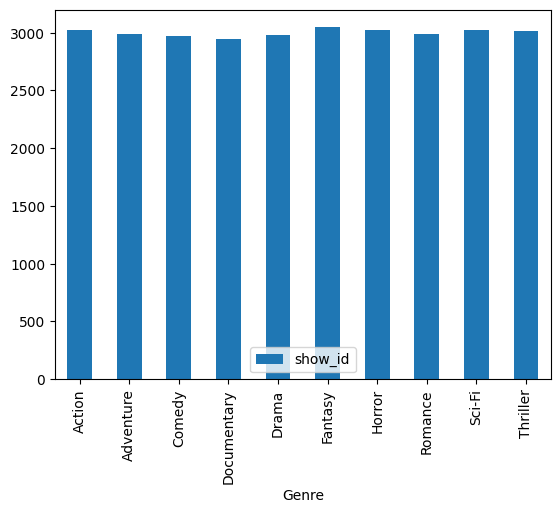

In [25]:
import matplotlib.pyplot as plt

# Use right join to merge the movie_to_genres and pop_movies tables
genres_movies = movies.merge(movies_list, how='right', 
                                      left_on = "show_id", 
                                      right_on = "show_id")

# Count the number of genres
genre_count = genres_movies.groupby('Genre').agg({'show_id':'count'})

# Plot a bar chart of the genre_count
genre_count.plot(kind='bar')
plt.show()

Nice job! The right join ensured that you were analyzing all of the pop_movies. You see from the results that adventure and action are the most popular genres

**Using outer join to select actors**

One cool aspect of using an outer join is that, because it returns all rows from both merged tables and null where they do not match, you can use it to find rows that do not have a match in the other table. To try for yourself, you have been given two tables with a list of actors from two popular movies: Iron Man 1 and Iron Man 2. Most of the actors played in both movies. Use an outer join to find actors who did not act in both movies.

The Iron Man 1 table is called iron_1_actors, and Iron Man 2 table is called iron_2_actors. Both tables have been loaded for you and a few rows printed so you can see the structure.



* Save to iron_1_and_2 the merge of iron_1_actors (left) with iron_2_actors tables with an outer join on the id column, and set suffixes to ('_1','_2').
* Create an index that returns True if name_1 or name_2 are null, and False otherwise.




In [ ]:
# Merge iron_1_actors to iron_2_actors on id with outer join using suffixes
iron_1_and_2 = iron_1_actors.merge(iron_2_actors,
                                     how ='outer',
                                     on = "id",
                                     suffixes=["_1","_2"])

# Create an index that returns true if name_1 or name_2 are null
m = ((iron_1_and_2['name_1'].isnull()) | 
     (iron_1_and_2['name_2'].isnull()))

# Print the first few rows of iron_1_and_2
print(iron_1_and_2[m].head())

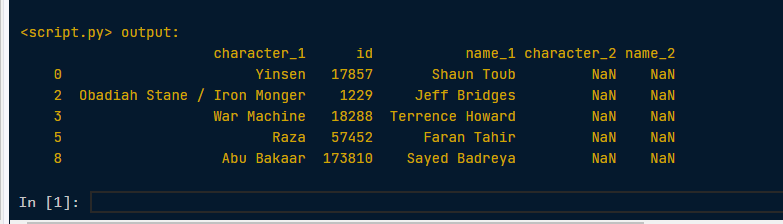

**Using an outer join, you were able to pick only those rows where the actor played in only one of the two movies.**